## 1

![Image Description](1.jpg)


In [74]:
def Miracle_Ways(n):
    dp = [0]*(n+1)
    dp[0] = dp[1] = 1
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]


In [78]:
Miracle_Ways(2)

2

In [79]:
Miracle_Ways(3)

3

In [80]:
Miracle_Ways(4)


5

In [81]:
Miracle_Ways(5)


8

## 2

![Image Description](2.jpg)


In [106]:
def MidguardWater(water_height,terrain):
    original_terrain = terrain
    water_ter  = []
    water_volume = []
    if terrain[0] > water_height:
        print("First Terrain higher than water")
        return
    
    for t_height in terrain:
        if t_height >= water_height:
            indx = terrain.index(t_height)
            terrain = terrain[:indx]
            break
    # print(terrain)

    for t in terrain:
        dumn = water_height - t
        filtered = [x for x in terrain if dumn >= x]
        # print(dumn)
        # print(filtered)
        if len(filtered) == len(terrain):
            water_ter.append(dumn)
            # print(water_ter)

    water = sorted(water_ter)
    min_water = water[0] 

    for w in terrain:
        dumw = min_water - w
        water_volume.append(dumw)
    
    if water_height - sum(water_volume) == 0:
        return min_water - min(terrain)
    else:
        dum_final0 = water_height - sum(water_volume)
        dum_final1 = dum_final0 / len(terrain)
        min_water1 = min_water + dum_final1
        return min_water1 - min(terrain)



In [155]:
import matplotlib.pyplot as plt

def plot_water_level(terrain, water, boundary):
    # compute the water level
    if max(terrain) > water:
        y_limit = max(terrain) + 1
    else:
        y_limit = boundary + 1

    water_level = [0] * len(terrain) 
    for num, height in enumerate(terrain):
        if height > water:
            water_level[num:] = [0] * (len(water_level) - num)
            break
        else:
            w = boundary - height
            water_level[num] = w

    # create the x-axis labels
    x_labels = range(len(terrain))

    # plot the terrain
    plt.bar(x_labels, terrain, color='brown', width=1, align='edge', label='Terrain height')

    # plot the water level
    plt.bar(x_labels, water_level, bottom=terrain, color='blue', width=1, align='edge', label='Water height')

    plt.xlabel('Position')
    plt.ylabel('Height')
    plt.ylim(0, y_limit)
    plt.legend(loc='upper right')
    plt.title('Water level over the terrain')
    plt.show()

### Problem2 Only Solution

In [118]:
MidguardWater(11,[3,5,4,5,2])

4

In [119]:
MidguardWater(5,[1,4,3,6])

3.333333333333333

In [120]:
MidguardWater(5,[1,4,6,3])

4.0

### Problem2 Visualization and Solution

Output : 4


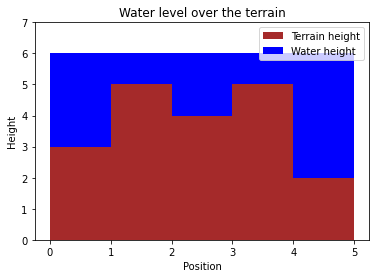

In [156]:
terrain = [3, 5, 4, 5, 2]
water = 11
boundary = min(terrain) + MidguardWater(water, terrain)
print(f"Output : {MidguardWater(water,terrain)}")
plot_water_level(terrain, water, boundary)

Output : 3.333333333333333


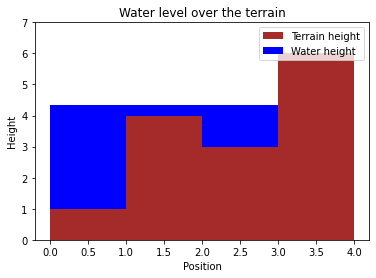

In [157]:
terrain = [1,4,3,6]
water = 5
boundary = min(terrain) + MidguardWater(water, terrain)
print(f"Output : {MidguardWater(water,terrain)}")
plot_water_level(terrain, water, boundary)

### เข้าใจว่าถ้ามีพื้นที่สูงมากั้นจะทำให้พื้นที่ต่อไป น้ำฝนไม่ไหลผ่าน

Output : 4.0


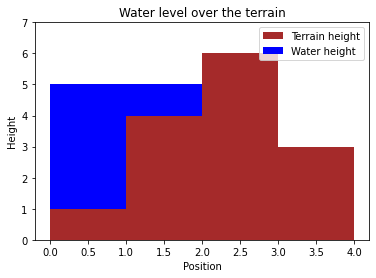

In [158]:
terrain = [1,4,6,3]
water = 5
boundary = min(terrain) + MidguardWater(water, terrain)
print(f"Output : {MidguardWater(water,terrain)}")
plot_water_level(terrain, water, boundary)

## 3

![Image Description](3.jpg)

![Image Description](3_1.jpg)

In [39]:
def count_max(lst):
    if not lst:
        return 0

    max_value = max(lst)
    count = lst.count(max_value)
    return count

def Midguard_Reservoir(height):
    max_values = sorted(height, reverse=True)[:2]

    first_max = max_values[0]
    second_max = max_values[1]
    reserve = 0
    result = [0] * (len(height) - 1)
    count_keep = 0
    water_keep = False
    index_result = 0
    orginal_height = height.copy()

    # Check if first highest pillar or second highest pillar is in the first or last position
    is_first_max = height[0] == first_max or height[-1] == first_max
    is_second_max = height[0] == second_max or height[-1] == second_max
    if is_first_max and is_second_max:
        result = [second_max] * (len(height) - 1)
        return result


    # If highest pillar more than 1
    elif count_max(height) > 1:
        # print(0)
        for h in range(1,len(height)):
            if h == len(result):
                if water_keep == True:
                   if height[h] >= reserve:
                        result[-1] = reserve
                   else:
                       result[-1] = height[h]
                else:
                    if height[h] < height[h-1]:
                        result[-1] = height[h]
                    else:
                        result[-1] = height[h-1]

            

            elif height[h] > height[h-1] and water_keep == False:
                result[index_result] = height[h-1]
                index_result += 1
                # result.append(height[h-1])
            elif water_keep:
                if height[h] < reserve:
                    count_keep += 1
                    continue
                else:
                    result[index_result:(index_result+count_keep+1)] = [reserve]*(count_keep+1)
                    index_result += (index_result + count_keep + 1)
                    count_keep = 0
                    water_keep = False
            else:
                reserve = height[h-1]
                water_keep = True
                count_keep += 1
                # print(reserve)
    
    else:
        # print(1)
        pillar = []
        for h in range(1,len(height)):
            # print(height[h])
            if h == len(result):
                if water_keep == True:
                   if height[h] >= reserve:
                        result[index_result:] = [reserve]*(count_keep+1)
                   else:
                       result[-1] = height[h]
                else:
                    if height[h] < height[h-1]:
                        result[-1] = height[h]
                    else:
                        result[-1] = height[h-1]

            elif height[h] > height[h-1] and water_keep == False:
                if height[h] <= pillar[-1] and pillar != []:
                    indx_pillar = height.index(pillar[-1])
                    result[indx_pillar:h] = [height[h]]*(h-indx_pillar)
                else:
                    result[index_result] = height[h-1]
                    index_result += 1
                # result.append(height[h-1])
            elif water_keep:
                if height[h] < reserve:
                    count_keep += 1
                    continue
                else:
                    result[index_result:(index_result+count_keep+1)] = [reserve]*(count_keep+1)
                    index_result += (index_result + count_keep + 1)
                    count_keep = 0
                    water_keep = False
                    
            else:
                if count_max(orginal_height) == 1:
                    if height[h-1] == max(orginal_height):
                        result[index_result] = height[h]
                        index_result += 1
                        pillar.append(height[h-1])
                        orginal_height.remove(height[h-1])
                    
                    # print(orginal_height)


                else:
                    # print(1)
                    reserve = height[h-1]
                    water_keep = True
                    count_keep += 1
                    # print(reserve)
    return (result)



In [40]:
print(Midguard_Reservoir([4, 3, 2, 1, 2])) # [3,2,2,2]
print(Midguard_Reservoir([3, 5, 4, 5, 2])) # [3,5,5,2]
print(Midguard_Reservoir([6, 5, 4, 1, 3, 2])) # [5,4,3,3,2]
print(Midguard_Reservoir([6, 5, 4, 1, 1, 3, 2])) #[5,4,3,3,3,2]
print(Midguard_Reservoir([6, 1, 3, 4, 6])) #[6,6,6,6]
print(Midguard_Reservoir([6, 1, 3, 4, 5])) # [5,5,5,5]


[3, 2, 2, 2]
[3, 5, 5, 2]
[5, 4, 3, 3, 2]
[5, 4, 3, 3, 3, 2]
[6, 6, 6, 6]
[5, 5, 5, 5]


### VIsualize for test

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Your data

def plot_reservoir_level(pillar_height, water_height):

    x_positions = np.arange(2 * max(len(pillar_height), len(water_height)))
    x_input = x_positions[::2]  
    x_output = x_positions[1::2]  
    water_height += [0] * (len(pillar_height) - len(water_height))


    fig, ax = plt.subplots()
    gray_bars = ax.bar(x_input, pillar_height, color='gray', width=1.0, align='edge', label='Input')
    ax.bar(x_output, water_height, color='blue', width=1.0, align='edge', label='Output')
    for i, (inp, out) in enumerate(zip(pillar_height, water_height)):
        if inp < out:
            ax.bar(x_input[i], out - inp, bottom=inp, color='blue', width=1.0, align='edge')


    ax.set_ylabel('Height')
    ax.set_title('Midguard Reservoir')
    ax.legend()


    ax.set_xticks(x_input + 0.5)
    ax.set_xticklabels(pillar_height)

    # Show the plot
    plt.tight_layout()
    plt.show()


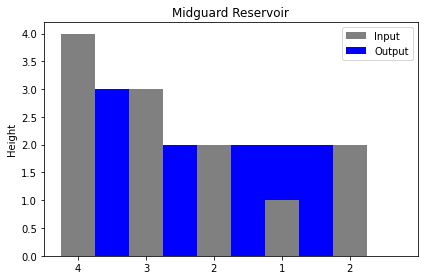

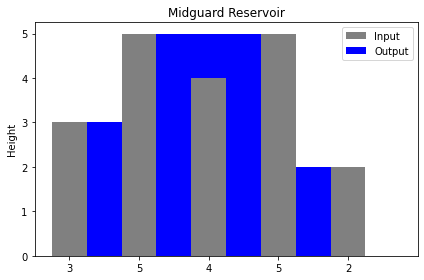

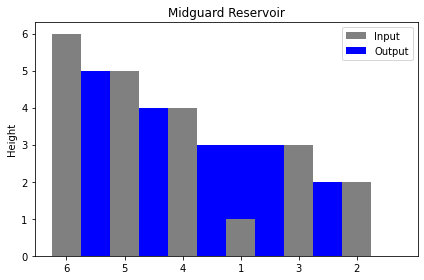

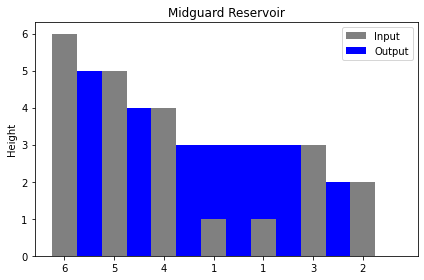

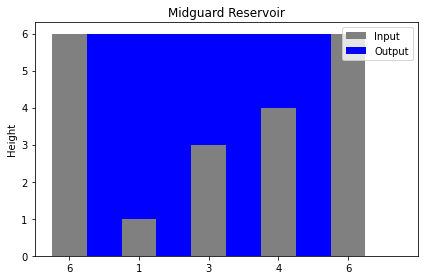

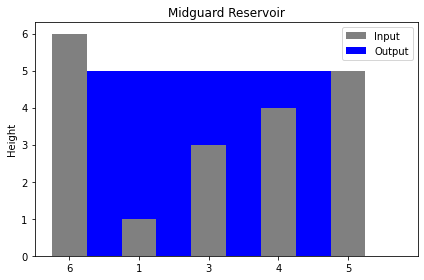

In [66]:
pillar_height = [
    [4, 3, 2, 1, 2],
    [3, 5, 4, 5, 2],
    [6, 5, 4, 1, 3, 2],
    [6, 5, 4, 1, 1, 3, 2],
    [6, 1, 3, 4, 6],
    [6, 1, 3, 4, 5]
]

reservoir = [
    Midguard_Reservoir([4, 3, 2, 1, 2]),
    Midguard_Reservoir([3, 5, 4, 5, 2]),
    Midguard_Reservoir([6, 5, 4, 1, 3, 2]),
    Midguard_Reservoir([6, 5, 4, 1, 1, 3, 2]),
    Midguard_Reservoir([6, 1, 3, 4, 6]),
    Midguard_Reservoir([6, 1, 3, 4, 5])
]

for p,r in zip(pillar_height,reservoir):
    plot_reservoir_level(p,r)


## 4

![Image Description](4.jpg)

![Image Description](4_1.jpg)

In [150]:
def suspect_detector(num, suspect):
    meet_booking = [-1]*num
    dummy_booking = []
    dummy_suspect = sorted(suspect)
    for s in dummy_suspect:
        target = suspect.index(s)
        if target != 0 and target != (num-1):
            if meet_booking[target-1] == -1 and meet_booking[target+1] == -1:
                meet_booking[target] = 0
            elif meet_booking[target-1] != -1 or meet_booking[target+1] != -1:
                meet_booking[target] = "Process"
                if -1 in meet_booking :
                    for index,value in enumerate(meet_booking):
                        if value == -1:
                            dummy_booking.append(index)
                            if index == 0:
                                if meet_booking[index+1] == -1 or meet_booking[index+1] == "Process":
                                    meet_booking[target] = 2
                                    break

                            elif index == num-1:
                                # print(meet_booking[index-1])
                                if meet_booking[index-1] == -1 or meet_booking[index-1] == "Process":
                                    meet_booking[target] = 2
                                    break

                            else:
                                if ((meet_booking[index-1] == -1 or meet_booking[index-1] == "Process") and \
                                    (meet_booking[index+1] == -1 or meet_booking[index+1] == "Process")):
                                    meet_booking[target] = 2 
                                    break

                    if meet_booking[target] == "Process" :
                        meet_booking[target] = 1
                else:
                    meet_booking[target] = 1
            
        elif target == 0:
            if meet_booking[target+1] == -1:
                meet_booking[target] = 0
            else:
                meet_booking[target] = "Process"
                if -1 in meet_booking :
                    for index,value in enumerate(meet_booking):
                        
                        if value == -1:
                            dummy_booking.append(index)
                            if index == 0:
                                if meet_booking[index+1] == -1 or meet_booking[index+1] == "Process":
                                    meet_booking[target] = 2
                                    break

                            elif index == num-1:
                                if meet_booking[index-1] == -1 or meet_booking[index-1] == "Process":
                                    meet_booking[target] = 2
                                    break
                            else:
                                if ((meet_booking[index-1] == -1 or meet_booking[index-1] == "Process") and \
                                    (meet_booking[index+1] == -1 or meet_booking[index+1] == "Process")):
                                    meet_booking[target] = 2 
                                    break
                    if meet_booking[target] == "Process" :
                        meet_booking[target] = 1
                else:
                    meet_booking[target] = 1
        else:
            if meet_booking[target-1] == -1:
                meet_booking[target] = 0
            else:
                meet_booking[target] = "Process"
                if -1 in meet_booking :
                    for index,value in enumerate(meet_booking):
                        if value == -1:
                            dummy_booking.append(index)
                            if index == 0:
                                if meet_booking[index+1] == -1 or meet_booking[index+1] == "Process":
                                    meet_booking[target] = 2
                                    break

                            elif index == num-1:
                                if meet_booking[index-1] == -1 or meet_booking[index-1] == "Process":
                                    meet_booking[target] = 2
                                    break
                            else:
                                if ((meet_booking[index-1] == -1 or meet_booking[index-1] == "Process") and \
                                    (meet_booking[index+1] == -1 or meet_booking[index+1] == "Process")):
                                    meet_booking[target] = 2 
                                    break
                    if meet_booking[target] == "Process" :
                        meet_booking[target] = 1
                else:
                    meet_booking[target] = 1
    return(meet_booking)




                    
                    






In [153]:
print(suspect_detector(5,[5,4,1,3,2]))
print(suspect_detector(4,[4,1,2,3]))
print(suspect_detector(5,[3,2,1,4,5]))

[1, 2, 0, 2, 0]
[1, 0, 2, 1]
[2, 2, 0, 2, 1]
